In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
import itertools
#Sklearn for machine learning 
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [0]:
data = pd.read_excel("/content/drive/My Drive/DATASET.xlsx")

In [0]:
data.head()

,Group Id,AD_WEEK_ENDING_DATE,Category,Number of stores,markdown,scan_cost,promos,print_ad,digital_ad,instore_ad,mechanism of promotion,national_brand,total_tonnage,total_sales,price,num_of_stores_on_promotion
0,85392300293,1/17/2017,790,73,84.16,785.700,1,1,0,1,5,1,582.0,1155.00,1.984536,84
1,35087,9/24/2019,790,39,59.68,473.850,1,0,0,1,3,1,486.0,810.14,1.666955,36
2,81829001026,2017-03-01 00:00:00,790,70,40.32,293.000,1,0,0,1,3,1,293.0,352.75,1.203925,55
3,81590902027,2/13/2018,790,34,47.43,347.170,1,0,0,1,5,1,233.0,459.00,1.969957,72
4,30601,2017-10-01 00:00:00,575,100,878.54,7290.068,1,1,0,1,4,1,6658.0,9935.30,1.492235,71


In [0]:
print ("The Dataset has {} Rows and {} Variables".format(str(data.shape[0]),str(data.shape[1])))

The Dataset has 88853 Rows and 16 Variables


In [0]:
data.dtypes

Group Id                        int64
AD_WEEK_ENDING_DATE            object
Category                        int64
Number of stores                int64
markdown                      float64
scan_cost                     float64
promos                          int64
print_ad                        int64
digital_ad                      int64
instore_ad                      int64
mechanism of promotion          int64
national_brand                  int64
total_tonnage                 float64
total_sales                   float64
price                         float64
num_of_stores_on_promotion      int64
dtype: object

Changing the "AD_WEEK_ENDING_DATE" from object to datetime type

In [0]:
data['AD_WEEK_ENDING_DATE'] = pd.to_datetime(data['AD_WEEK_ENDING_DATE'])

Checking for missing values

In [0]:
data.isnull().sum()

Group Id                        0
AD_WEEK_ENDING_DATE             0
Category                        0
Number of stores                0
markdown                        0
scan_cost                       0
promos                          0
print_ad                        0
digital_ad                      0
instore_ad                      0
mechanism of promotion          0
national_brand                  0
total_tonnage                   0
total_sales                     0
price                         753
num_of_stores_on_promotion      0
dtype: int64

There are 753 rows with value missing for price column

In [0]:
data[data.isna().any(axis=1)]

,Group Id,AD_WEEK_ENDING_DATE,Category,Number of stores,markdown,scan_cost,promos,print_ad,digital_ad,instore_ad,mechanism of promotion,national_brand,total_tonnage,total_sales,price,num_of_stores_on_promotion
476,4830,2017-08-08,1010,1,0.0,0.0,0,0,0,0,0,1,0.0,0.0,NaN,9
486,88124511532,2019-09-24,786,1,0.0,0.0,0,0,0,0,0,1,0.0,0.0,NaN,2
560,19947,2018-06-02,790,1,0.0,0.0,0,0,0,0,0,1,0.0,0.0,NaN,73
639,4190007949,2019-01-01,786,1,0.0,0.0,0,0,0,0,0,1,0.0,0.0,NaN,19
858,7273026307,2019-01-10,786,1,0.0,0.0,0,0,0,0,0,1,0.0,0.0,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88321,81590902007,2018-01-16,790,2,0.0,0.0,0,0,0,0,1,1,0.0,0.0,NaN,94
88402,7047046577,2017-02-14,790,1,0.0,0.0,0,0,0,0,1,1,0.0,0.0,NaN,76
88439,34193,2019-03-09,790,1,0.0,0.0,0,0,0,0,1,1,0.0,0.0,NaN,35
88485,3663201343,2018-05-15,790,1,0.0,0.0,1,0,0,1,10,1,0.0,0.0,NaN,100


Rows in which price column have missing value does not have any proper values in other columns too so they are removed instead of being replaced
 

In [0]:
data =data.dropna(subset = ['price'],axis=0)

In [0]:
data.isnull().sum()

Group Id                      0
AD_WEEK_ENDING_DATE           0
Category                      0
Number of stores              0
markdown                      0
scan_cost                     0
promos                        0
print_ad                      0
digital_ad                    0
instore_ad                    0
mechanism of promotion        0
national_brand                0
total_tonnage                 0
total_sales                   0
price                         0
num_of_stores_on_promotion    0
dtype: int64

In [0]:
print ("The Updated Dataset has {} Rows and {} Variables".format(str(data.shape[0]),str(data.shape[1])))

The Updated Dataset has 88100 Rows and 16 Variables


In [0]:
data = data.sort_values(by=['AD_WEEK_ENDING_DATE'])
data.reset_index(drop=True)

,Group Id,AD_WEEK_ENDING_DATE,Category,Number of stores,markdown,scan_cost,promos,print_ad,digital_ad,instore_ad,mechanism of promotion,national_brand,total_tonnage,total_sales,price,num_of_stores_on_promotion
0,23299,2017-01-08,575,66,0.00,1338.265,0,0,0,0,0,1,414.0,1576.03,3.806836,68
1,4131853136,2017-01-08,786,99,0.00,8211.408,0,0,0,0,0,0,3438.0,14747.42,4.289535,27
2,74447394124,2017-01-08,786,72,0.00,688.550,0,0,0,0,0,1,293.0,1081.17,3.690000,27
3,4190007704,2017-01-08,786,8,7.09,177.560,0,0,0,0,0,1,92.0,265.58,2.886739,27
4,30567,2017-01-08,575,88,0.00,1503.654,0,0,0,0,0,1,438.0,1970.04,4.497808,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88095,36417,2019-12-31,790,34,41.24,197.492,1,0,0,1,4,1,194.0,220.72,1.137732,37
88096,36019,2019-12-31,786,9,0.00,567.962,0,0,0,0,0,0,215.0,834.41,3.880977,17
88097,28617,2019-12-31,575,5,0.00,34.000,0,0,0,0,0,1,40.0,47.60,1.190000,66
88098,30676,2019-12-31,575,100,0.00,636.500,0,0,0,0,0,1,475.0,908.66,1.912968,66


**Margin** column calculated and included in the dataset

In [0]:
data['Margin'] = data['price'] - data['scan_cost']

In [0]:
data.head()

,Group Id,AD_WEEK_ENDING_DATE,Category,Number of stores,markdown,scan_cost,promos,print_ad,digital_ad,instore_ad,mechanism of promotion,national_brand,total_tonnage,total_sales,price,num_of_stores_on_promotion,Margin
58077,23299,2017-01-08,575,66,0.00,1338.265,0,0,0,0,0,1,414.0,1576.03,3.806836,68,-1334.458164
37889,4131853136,2017-01-08,786,99,0.00,8211.408,0,0,0,0,0,0,3438.0,14747.42,4.289535,27,-8207.118465
71767,74447394124,2017-01-08,786,72,0.00,688.550,0,0,0,0,0,1,293.0,1081.17,3.690000,27,-684.860000
71771,4190007704,2017-01-08,786,8,7.09,177.560,0,0,0,0,0,1,92.0,265.58,2.886739,27,-174.673261
37865,30567,2017-01-08,575,88,0.00,1503.654,0,0,0,0,0,1,438.0,1970.04,4.497808,68,-1499.156192


Added "Year","Day of Week","Number of Week","Month" column


In [0]:
data['Month'] = data['AD_WEEK_ENDING_DATE'].dt.month
data['DayofWeek'] = data['AD_WEEK_ENDING_DATE'].dt.dayofweek
data['Year']  = data['AD_WEEK_ENDING_DATE'].dt.year
data['Number of Week'] = data['AD_WEEK_ENDING_DATE'].dt.week

Rows with incorrect values e.g Number of stores < Number of stores on promotion are filtered out


In [0]:
data  = data[data['Number of stores'] >= data['num_of_stores_on_promotion']]

In [0]:
data.head()

,Group Id,AD_WEEK_ENDING_DATE,Category,Number of stores,markdown,scan_cost,promos,print_ad,digital_ad,instore_ad,mechanism of promotion,national_brand,total_tonnage,total_sales,price,num_of_stores_on_promotion,Margin,Month,DayofWeek,Year,Number of Week
37889,4131853136,2017-01-08,786,99,0.0,8211.408,0,0,0,0,0,0,3438.0,14747.42,4.289535,27,-8207.118465,1,6,2017,1
71767,74447394124,2017-01-08,786,72,0.0,688.550,0,0,0,0,0,1,293.0,1081.17,3.690000,27,-684.860000,1,6,2017,1
37865,30567,2017-01-08,575,88,0.0,1503.654,0,0,0,0,0,1,438.0,1970.04,4.497808,68,-1499.156192,1,6,2017,1
18596,71575610041,2017-01-08,1010,17,0.0,14.928,0,0,0,0,0,1,6.0,23.94,3.990000,8,-10.938000,1,6,2017,1
37843,33588,2017-01-08,786,28,1.5,91.302,0,0,0,0,0,1,154.0,149.50,0.970779,27,-90.331221,1,6,2017,1


In [0]:
print ("The Updated Dataset has {} Rows and {} Variables".format(str(data.shape[0]),str(data.shape[1])))

The Updated Dataset has 44887 Rows and 21 Variables


In [0]:
data.reset_index(drop=True)

,Group Id,AD_WEEK_ENDING_DATE,Category,Number of stores,markdown,scan_cost,promos,print_ad,digital_ad,instore_ad,mechanism of promotion,national_brand,total_tonnage,total_sales,price,num_of_stores_on_promotion,Margin,Month,DayofWeek,Year,Number of Week
0,4131853136,2017-01-08,786,99,0.00,8211.408,0,0,0,0,0,0,3438.0,14747.42,4.289535,27,-8207.118465,1,6,2017,1
1,74447394124,2017-01-08,786,72,0.00,688.550,0,0,0,0,0,1,293.0,1081.17,3.690000,27,-684.860000,1,6,2017,1
2,30567,2017-01-08,575,88,0.00,1503.654,0,0,0,0,0,1,438.0,1970.04,4.497808,68,-1499.156192,1,6,2017,1
3,71575610041,2017-01-08,1010,17,0.00,14.928,0,0,0,0,0,1,6.0,23.94,3.990000,8,-10.938000,1,6,2017,1
4,33588,2017-01-08,786,28,1.50,91.302,0,0,0,0,0,1,154.0,149.50,0.970779,27,-90.331221,1,6,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44882,7986,2019-12-31,786,111,4.95,2320.913,0,0,0,0,0,1,1631.0,3226.88,1.978467,17,-2318.934533,12,1,2019,1
44883,2718254799,2019-12-31,1102,102,30.18,9808.887,0,0,0,0,0,0,2269.0,13460.93,5.932539,10,-9802.954461,12,1,2019,1
44884,74236521670,2019-12-31,786,99,0.00,1635.738,0,0,0,0,0,1,849.0,2552.91,3.006961,17,-1632.731039,12,1,2019,1
44885,2396478905,2019-12-31,1102,79,36.90,2990.880,0,0,0,0,0,1,496.0,4355.84,8.781935,10,-2982.098065,12,1,2019,1


In [0]:
data.columns

Index(['Group Id', 'AD_WEEK_ENDING_DATE', 'Category', 'Number of stores',
       'markdown', 'scan_cost', 'promos', 'print_ad', 'digital_ad',
       'instore_ad', 'mechanism of promotion', 'national_brand',
       'total_tonnage', 'total_sales', 'price', 'num_of_stores_on_promotion',
       'Margin', 'Month', 'DayofWeek', 'Year', 'Number of Week'],
      dtype='object')

Columns with unique values and their count 

In [0]:
for i in ['Category','promos', 'print_ad', 'digital_ad','instore_ad', 'mechanism of promotion', 'national_brand','Month', 'DayofWeek', 'Year']:
    print( i+':',data[i].unique())
    print("Count of each value :")
    print(data[i].value_counts())

Category: [ 786  575 1010 1322 1102  790]
Count of each value :
786     13500
790     10877
575      9204
1322     5034
1102     4165
1010     2107
Name: Category, dtype: int64
promos: [0 1]
Count of each value :
0    26450
1    18437
Name: promos, dtype: int64
print_ad: [0 1]
Count of each value :
0    40585
1     4302
Name: print_ad, dtype: int64
digital_ad: [0 1]
Count of each value :
0    43922
1      965
Name: digital_ad, dtype: int64
instore_ad: [0 1]
Count of each value :
0    30419
1    14468
Name: instore_ad, dtype: int64
mechanism of promotion: [ 0 10  3  4  1  2  9  5 11]
Count of each value :
0     24198
1     11405
2      4574
10     2958
3       959
4       556
5       175
9        61
11        1
Name: mechanism of promotion, dtype: int64
national_brand: [0 1]
Count of each value :
1    38224
0     6663
Name: national_brand, dtype: int64
Month: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Count of each value :
10    4270
5     4270
3     4032
2     3860
7     3854
11    3717
8  

Tues     30695
Sat       3379
Sun       2841
Thurs     2277
Fri       2185
Mon       1889
Weds      1621
Name: DayofWeek, dtype: int64


Text(0.5, 1.0, 'Count of days in week')

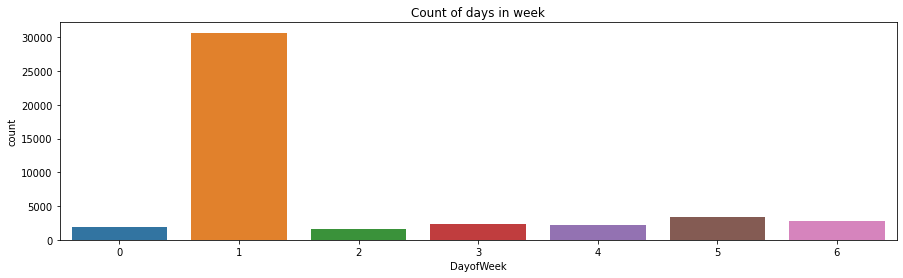

In [0]:
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
plt.figure(figsize=(15,4))
print(data['DayofWeek'].apply(lambda x : days[x]).value_counts())
sns.countplot("DayofWeek",data = data)
plt.title("Count of days in week")

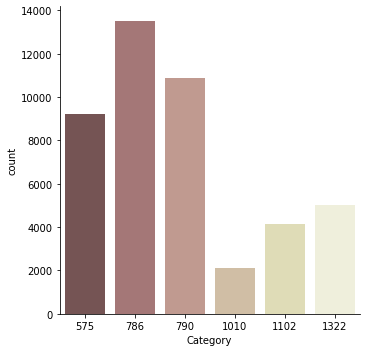

In [0]:
sns.catplot(x="Category", kind="count", palette="pink", data=data)

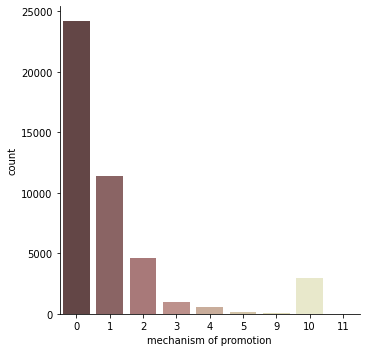

In [0]:
sns.catplot(x="mechanism of promotion", kind="count", palette="pink", data=data)

Oct    4270
May    4270
Mar    4032
Feb    3860
Jul    3854
Nov    3717
Aug    3676
Dec    3672
Jan    3625
Apr    3537
Jun    3302
Sep    3072
Name: Month, dtype: int64


Text(0.5, 1.0, 'Count of Month')

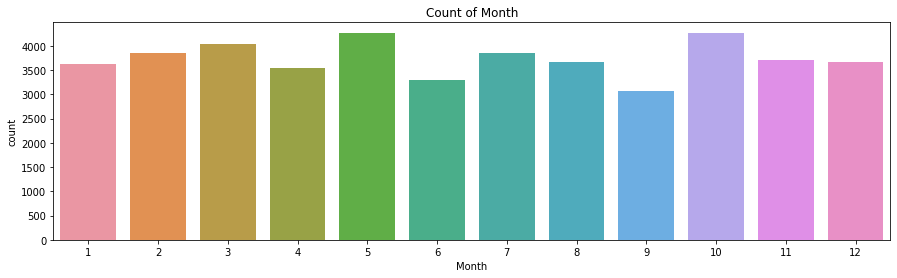

In [0]:
month = {1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}
plt.figure(figsize=(15,4))
print(data['Month'].apply(lambda x: month[x]).value_counts())
sns.countplot("Month",data = data)
plt.title("Count of Month")

2017    16750
2018    14394
2019    13743
Name: Year, dtype: int64


Text(0.5, 1.0, 'Count of Year')

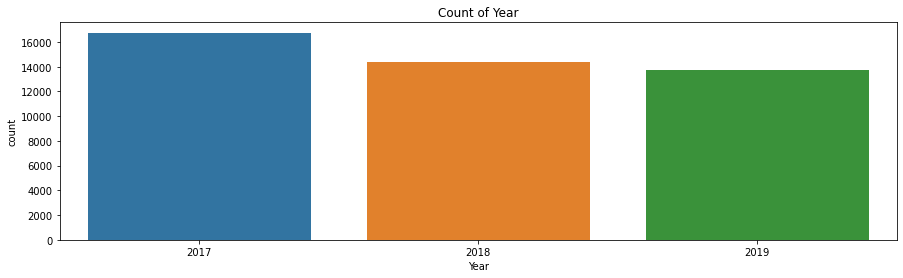

In [0]:
plt.figure(figsize=(15,4))
print(data['Year'].value_counts())
sns.countplot("Year",data = data)
plt.title("Count of Year")

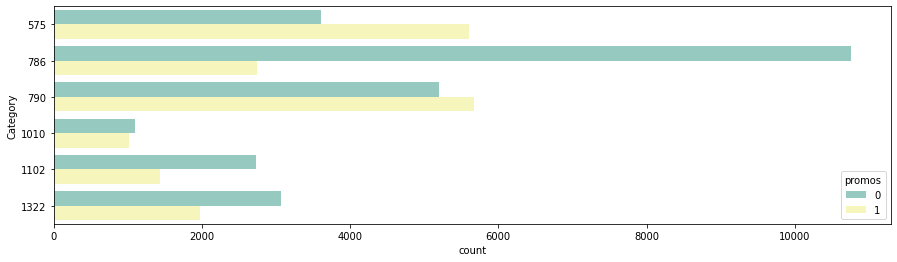

In [0]:
plt.figure(figsize=(15,4))
sns.countplot(y="Category", hue="promos", data=data,palette='Set3')

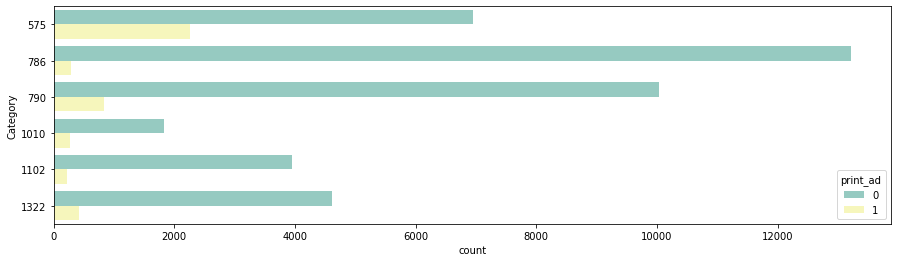

In [0]:
plt.figure(figsize=(15,4))
sns.countplot(y="Category", hue="print_ad", data=data,palette='Set3')

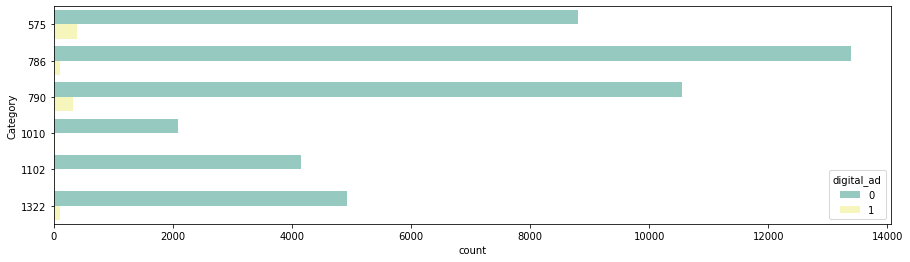

In [0]:
plt.figure(figsize=(15,4))
sns.countplot(y="Category", hue="digital_ad", data=data,palette='Set3')

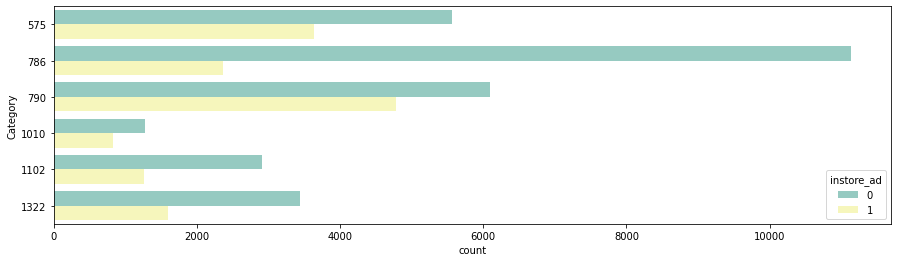

In [0]:
plt.figure(figsize=(15,4))
sns.countplot(y="Category", hue="instore_ad", data=data,palette='Set3')

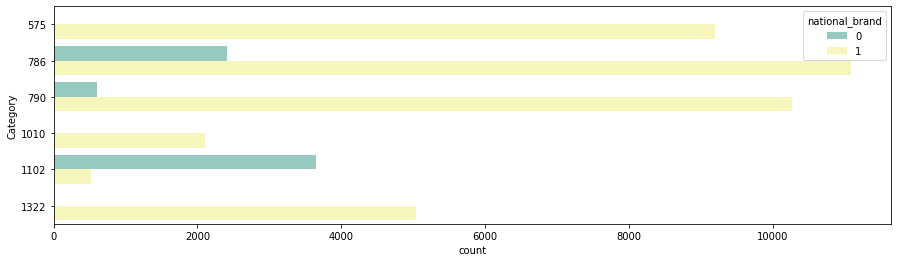

In [0]:
plt.figure(figsize=(15,4))
sns.countplot(y="Category", hue="national_brand", data=data,palette='Set3')

Text(0.5, 1.0, 'Statistics of Sale')

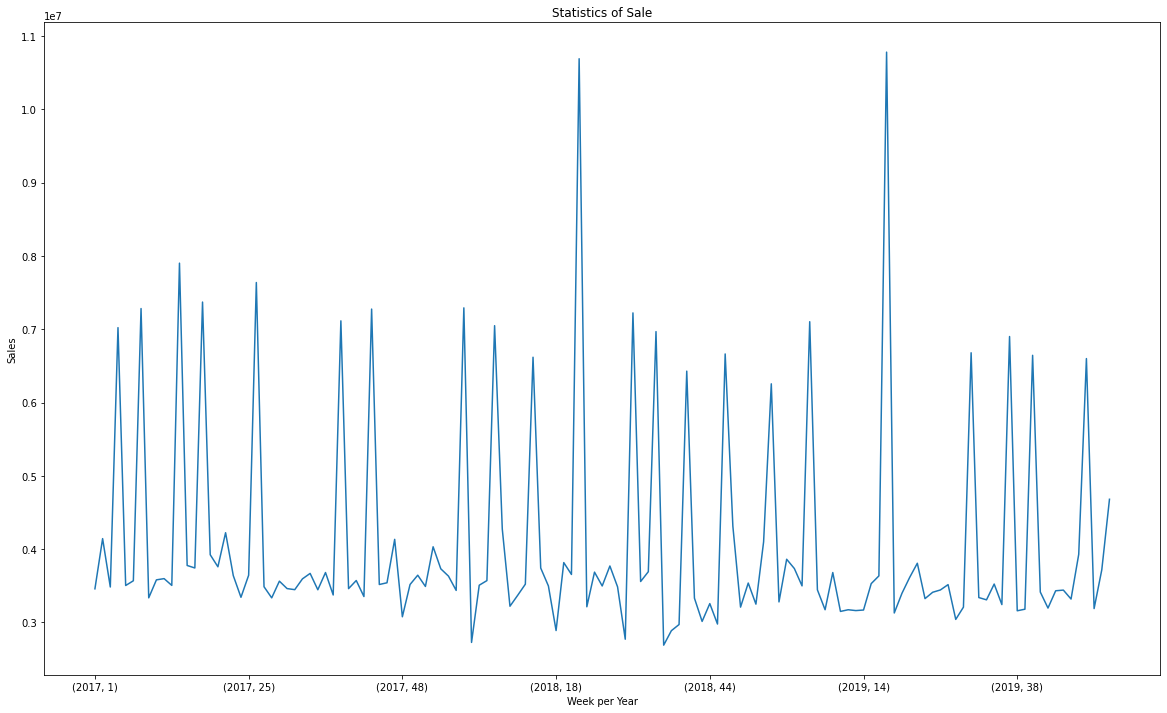

In [336]:
fig, ax = plt.subplots(figsize=(20,12))
data.groupby(['Year','Number of Week']).sum()['total_sales'].plot(ax=ax,kind = "line")
plt.xlabel("Week per Year")
plt.ylabel("Sales")
plt.title("Statistics of Sale")

Text(0.5, 1.0, 'Weekly Statistics of Sale')

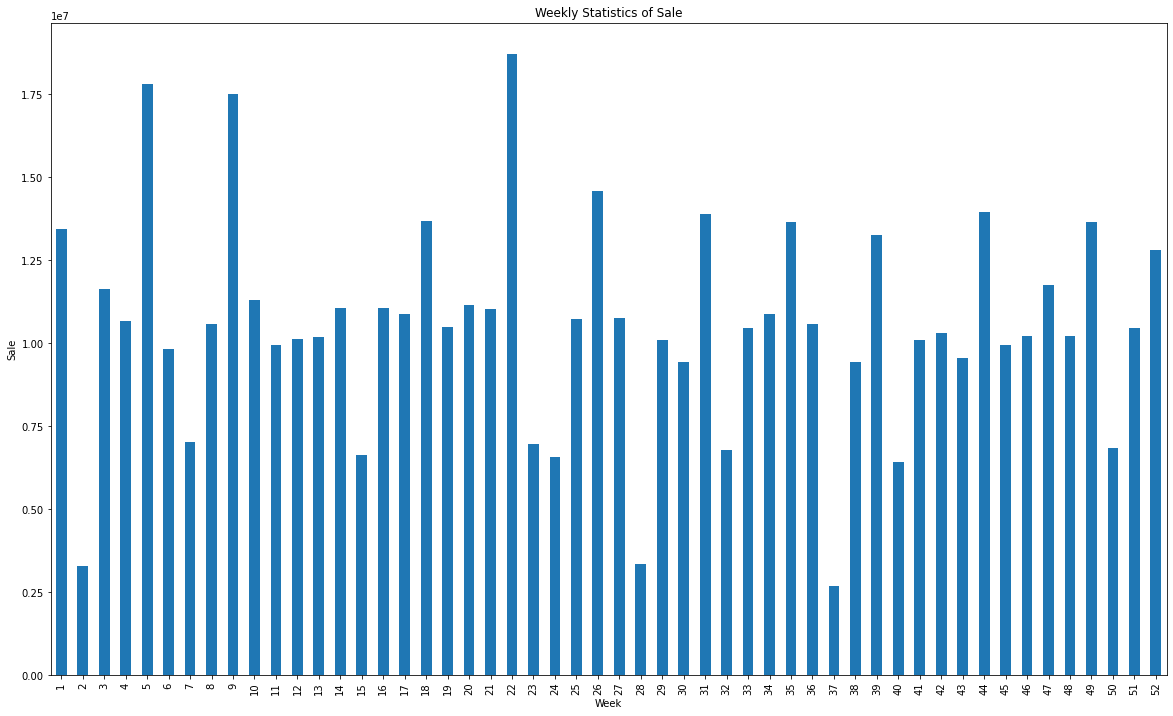

In [0]:
fig, ax = plt.subplots(figsize=(20,12))
data.groupby(['Number of Week']).sum()['total_sales'].plot(ax=ax,kind = "bar")
plt.xlabel("Week")
plt.ylabel("Sale")
plt.title("Weekly Statistics of Sale")

Text(0.5, 1.0, 'Monthly Statistics of Sale')

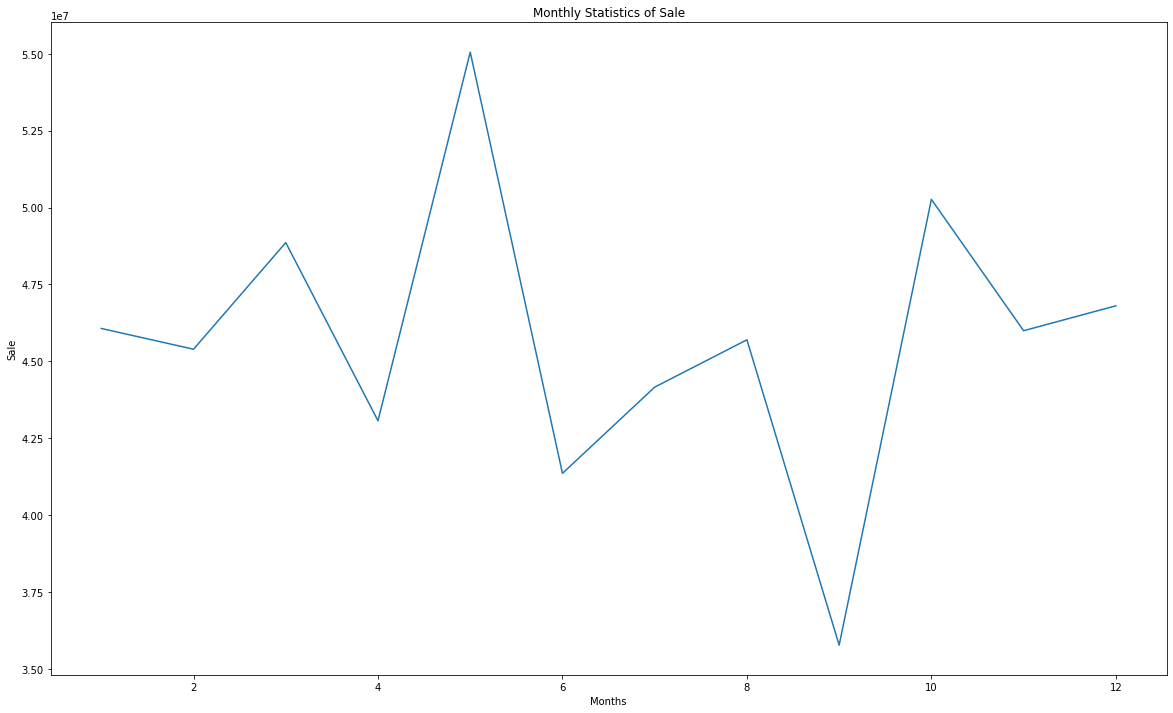

In [0]:
fig, ax = plt.subplots(figsize=(20,12))
data.groupby(['Month']).sum()['total_sales'].plot(ax=ax,kind ="line")
plt.xlabel("Months")
plt.ylabel("Sale")
plt.title("Monthly Statistics of Sale")


Text(0.5, 1.0, 'Yearly Statistics of Sale')

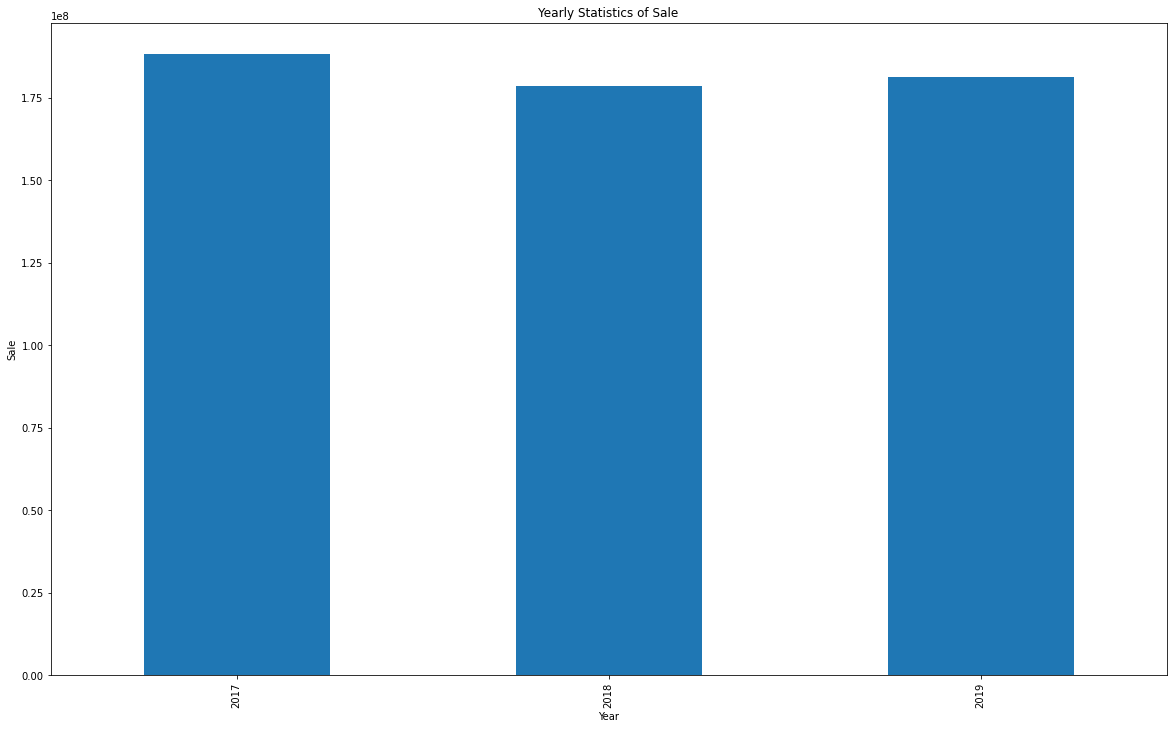

In [0]:
fig, ax = plt.subplots(figsize=(20,12))
data.groupby(['Year']).sum()['total_sales'].plot(ax=ax,kind ="bar")
plt.xlabel("Year")
plt.ylabel("Sale")
plt.title("Yearly Statistics of Sale")

Text(0.5, 1.0, 'Weekly Statistics of Sale groupby Group Id')

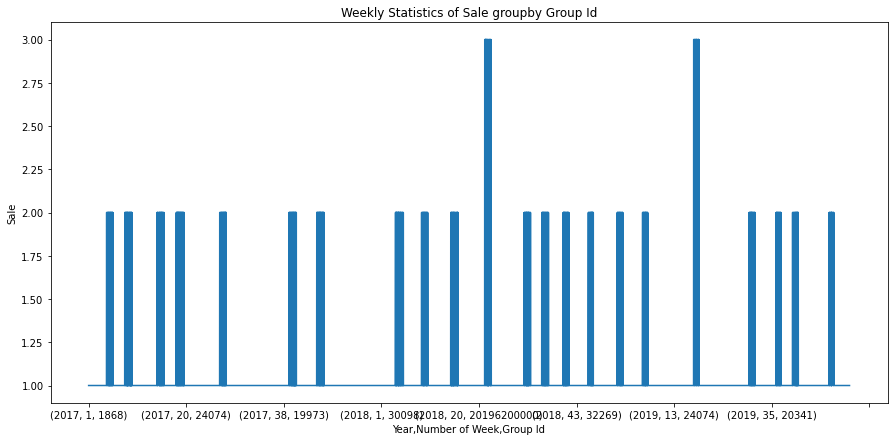

In [0]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby(['Year','Number of Week','Group Id']).count()['total_sales'].plot(ax=ax)
plt.ylabel("Sale")
plt.title("Weekly Statistics of Sale groupby Group Id")

Text(0.5, 6.79999999999999, 'Modes of promotion')

<Figure size 1080x576 with 0 Axes>

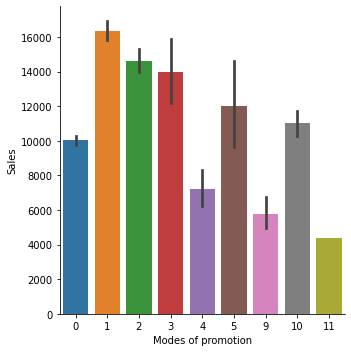

In [0]:
plt.figure(figsize=(15,8))
sns.catplot(x="mechanism of promotion", y="total_sales", data=data,kind="bar");
plt.ylabel("Sales")
plt.xlabel("Modes of promotion")

Text(32.6312131076389, 0.5, 'Sales')

<Figure size 1080x720 with 0 Axes>

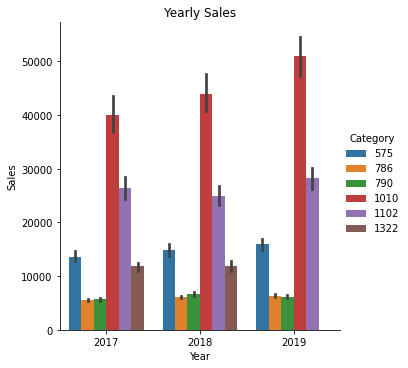

In [0]:
plt.figure(figsize=(15,10))
sns.catplot(y ="total_sales",x = "Year",data=data,hue="Category",kind="bar")
plt.title("Yearly Sales")
plt.xlabel("Year")
plt.ylabel("Sales")

Text(0.5, 1.0, 'National Brand (Sales vs Price)')

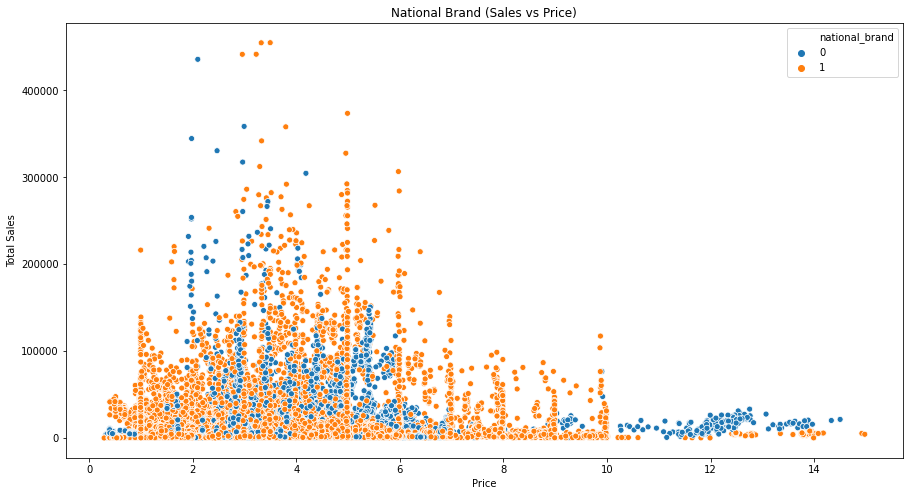

In [0]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="price",y="total_sales",hue="national_brand",data=data)
plt.xlabel("Price")
plt.ylabel("Total Sales")
plt.title("National Brand (Sales vs Price)")

Text(0.5, 1.0, 'Promos (Sales vs Price)')

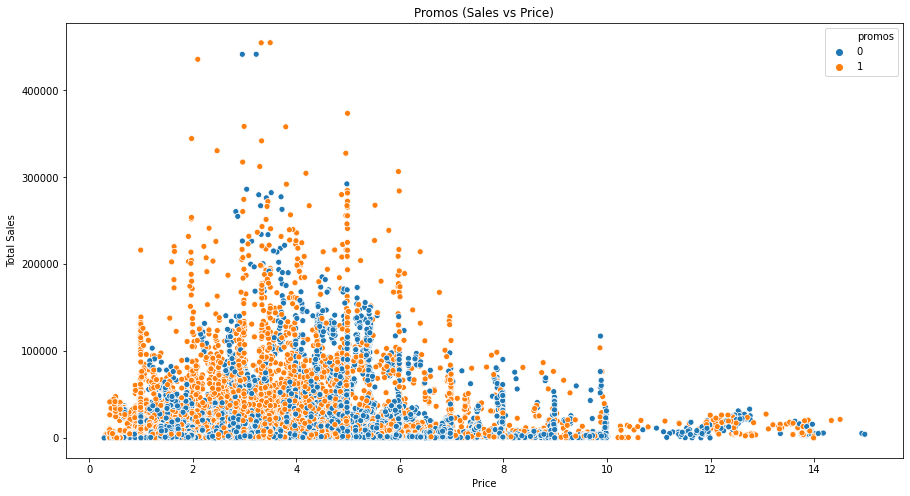

In [0]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="price",y="total_sales",hue="promos",data=data)
plt.xlabel("Price")
plt.ylabel("Total Sales")
plt.title("Promos (Sales vs Price)")

Text(0.5, 1.0, 'Category (Sales vs Price)')

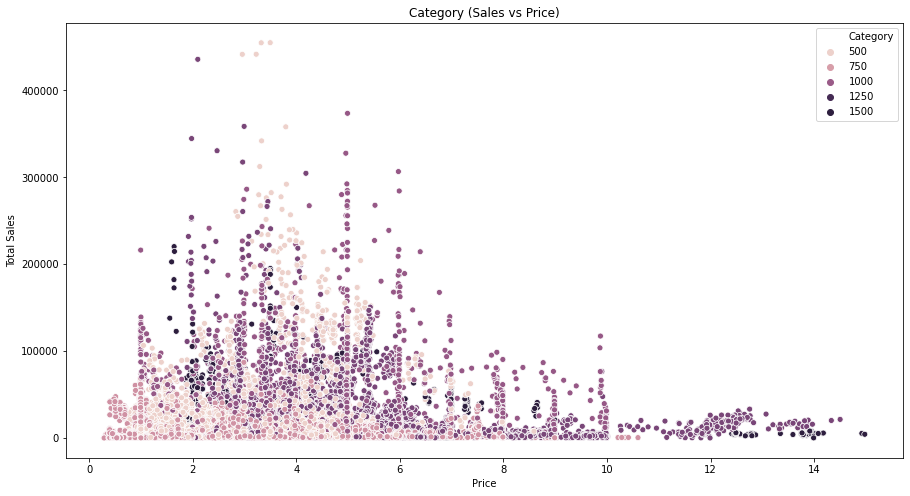

In [0]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="price",y="total_sales",hue="Category",data=data)
plt.xlabel("Price")
plt.ylabel("Total Sales")
plt.title("Category (Sales vs Price)")

Text(0.5, 1.0, 'Category (Sales vs Cost)')

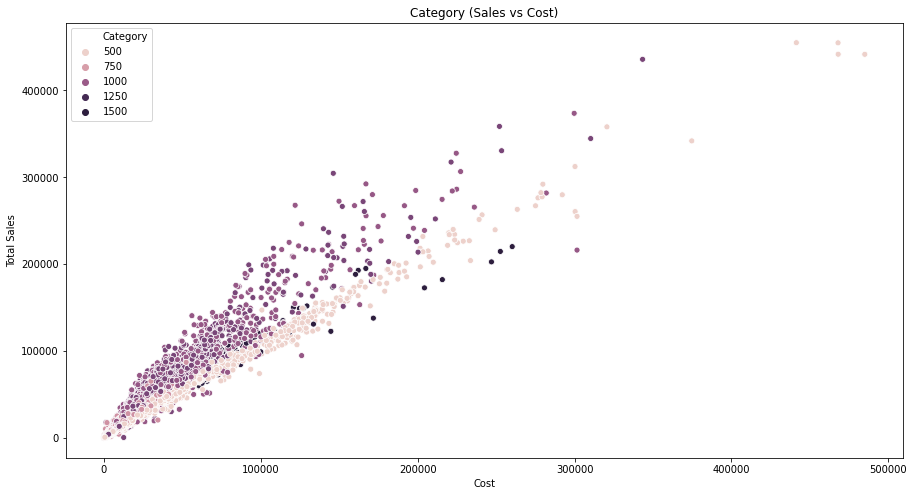

In [0]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="scan_cost",y="total_sales",hue="Category",data=data)
plt.xlabel("Cost")
plt.ylabel("Total Sales")
plt.title("Category (Sales vs Cost)")

Text(0.5, 1.0, 'Promos(Sales vs Cost)')

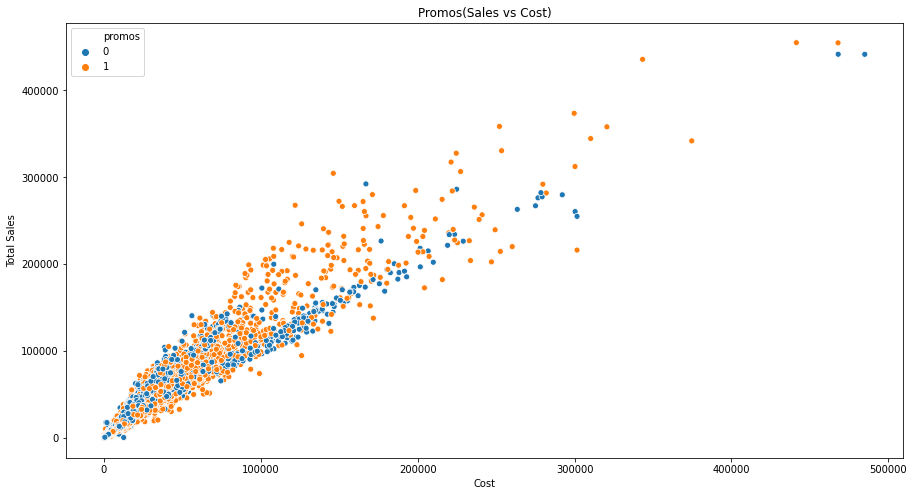

In [0]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="scan_cost",y="total_sales",hue="promos",data=data)
plt.xlabel("Cost")
plt.ylabel("Total Sales")
plt.title("Promos(Sales vs Cost)")

Text(0.5, 1.0, 'National Brand(Sales vs Cost)')

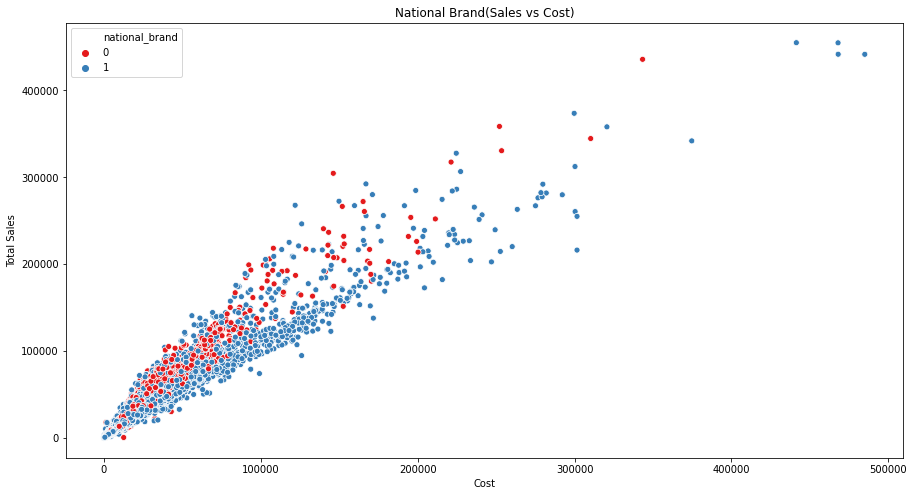

In [0]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="scan_cost",y="total_sales",hue="national_brand",data=data,palette="Set1")
plt.xlabel("Cost")
plt.ylabel("Total Sales")
plt.title("National Brand(Sales vs Cost)")

Text(0.5, 1.0, 'Digital Ad(Sales vs Cost)')

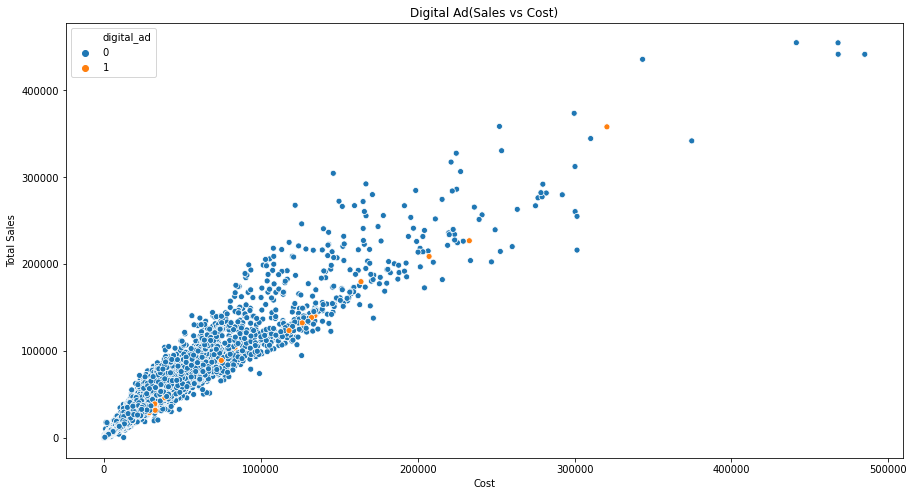

In [0]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="scan_cost",y="total_sales",hue="digital_ad",data=data)
plt.xlabel("Cost")
plt.ylabel("Total Sales")
plt.title("Digital Ad(Sales vs Cost)")

Text(0.5, 1.0, 'Print Ad(Sales vs Cost)')

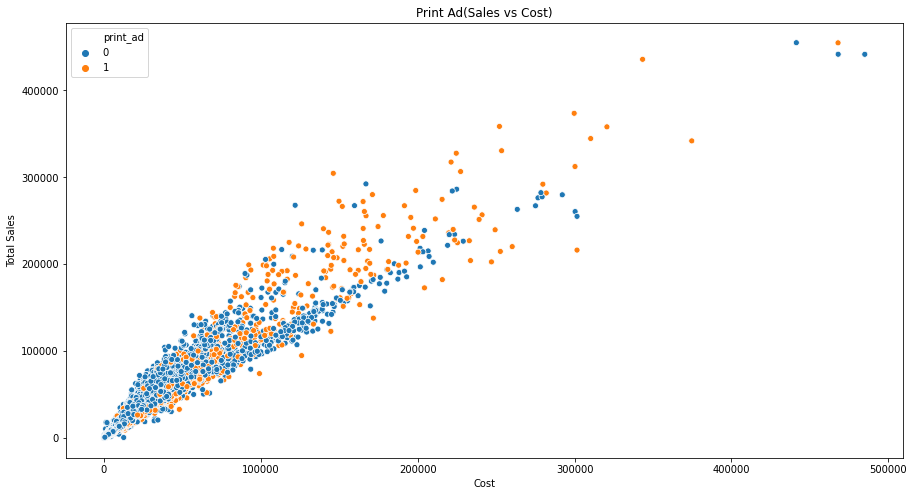

In [0]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="scan_cost",y="total_sales",hue="print_ad",data=data)
plt.xlabel("Cost")
plt.ylabel("Total Sales")
plt.title("Print Ad(Sales vs Cost)")

Text(0.5, 1.0, 'Instore Ad(Sales vs Cost)')

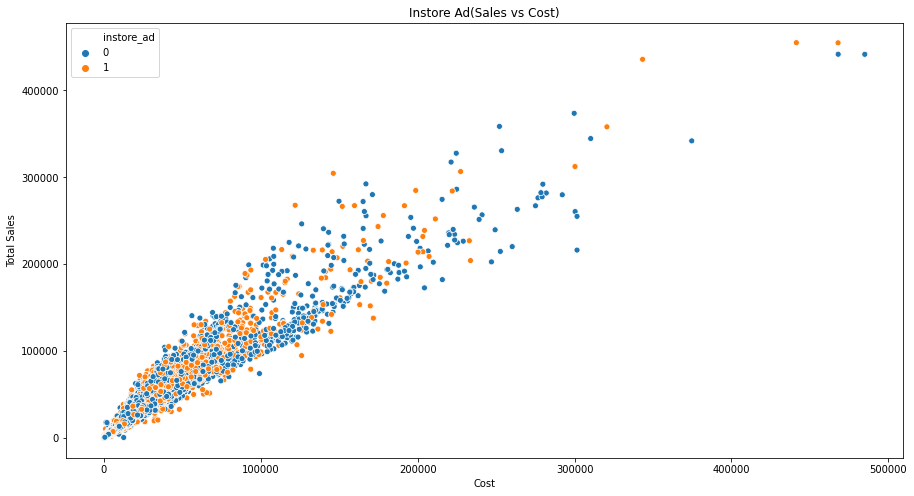

In [0]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="scan_cost",y="total_sales",hue="instore_ad",data=data)
plt.xlabel("Cost")
plt.ylabel("Total Sales")
plt.title("Instore Ad(Sales vs Cost)")

Summary

Initially the the Dataset has 88853 Rows and 16 Variables.The categorical features present in the dataset are ['Category,'promos', 'print_ad', 'digital_ad','instore_ad', 'mechanism of promotion', 'national_brand'] where print_ad, digital_ad,instore_ad,promos,national_brand has only two values [0,1] 1 is yes and 0 is no.Other are Category: [ 786  575 1010 1322 1102  790] mechanism of promotion: [ 0 10  3  4  1  2  9  5 11].There is one column "AD_WEEK_ENDING_DATE" which has data of dates so it is coverted to datetime type.After that the whole dataset is sorted according to the dates. From this we observed that the data is of three years (2017-2019)starting from 2017-01-08.There are 753 values in price column which are missing/not defined also value of other columns along these rows are too arbitary or null hence all of them are removed.The Updated Dataset now has 88100 Rows and 16 Variables. Then a new feature Margin is added using formula [Margin = Price - scan_cost ].Also columns like "Month","Year,"Day of Week","Number of Week" are also added for EDA. Then the rows with value having value of Number of stores < numbers of stores in promotion are removed and now we are left with 44887 Rows and 21 Variables.


---


---


